# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [60]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [61]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# read the data
# df = pd.read_csv('foodhub_order.csv')
df = pd.read_csv('/content/drive/MyDrive/Archive/MIT_IDSS/Foundations - Python and Statistics/week2/Project Assessment: Foundations for Data Science/foodhub_order.csv')
print(df.shape)
# returns the first 5 rows
df.head()

(1898, 9)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [63]:
# Write your code here
print(df.shape)

(1898, 9)


#### Observations: There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [64]:
# Use info() to print a concise summary of the DataFrame
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


None

#### Observations: order_id, customer_id, food_preparation_time, and delivery_time are of type int. restaurant_name, cuisine_type, day_of_the_week, and rating are of type object. Additionally, cost_of_the_order is of type float.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [65]:
# Write your code here
df.isnull().sum().reset_index().rename(columns={'index':'columns', 0:'null_count'})

,columns,null_count
0,order_id,0
1,customer_id,0
2,restaurant_name,0
3,cuisine_type,0
4,cost_of_the_order,0
5,day_of_the_week,0
6,rating,0
7,food_preparation_time,0
8,delivery_time,0


#### Observations: There are no null values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [66]:
# Write your code here
df.describe(exclude=['O'])

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: The minimum food preparation time is 20 minutes, the average is 27 minutes, and the maximum is 35 minutes.


### **Question 5:** How many orders are not rated?

In [67]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [68]:
# Write the code here
display(df['rating'].value_counts())
print(f"{ df.loc[df['rating']=='Not given', 'order_id'].nunique() / df['order_id'].nunique()}")

,count
rating,
Not given,736
5,588
4,386
3,188


0.38777660695468913


#### Observations: There are 736 ratings marked as 'not given,' which accounts for approximately 38.77% of the total orders.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

median: 14.14, Q1: 12.08, Q3: 22.2975, max: 35.41


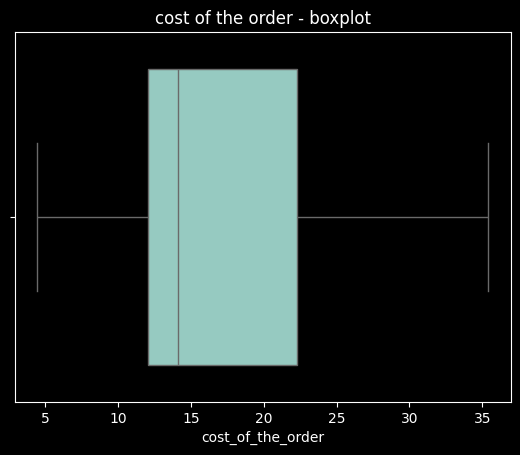

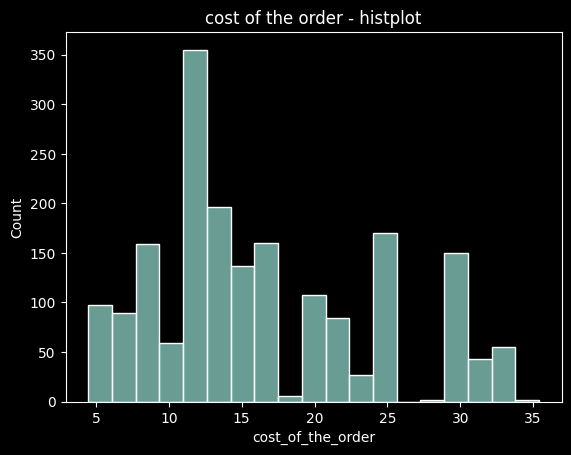

In [69]:
# cost_of_the_order
print(f"median: {df['cost_of_the_order'].median()}, Q1: {np.percentile(df['cost_of_the_order'], 25)}, Q3: {np.percentile(df['cost_of_the_order'], 75)}, max: {df['cost_of_the_order'].max()}")
plt.style.use(['dark_background'])
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('cost of the order - boxplot')
plt.show()
sns.histplot(data=df, x='cost_of_the_order')
plt.title('cost of the order - histplot')
plt.show()

In [70]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


median: 27.0, Q1: 23.0, Q3: 31.0, max: 35
median: 27.0, Q1: 23.0, Q3: 31.0, max: 35


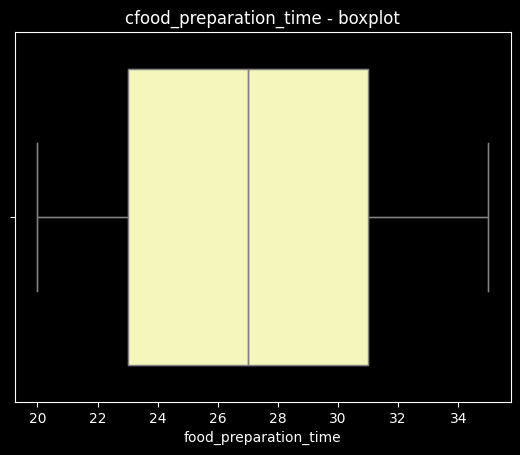

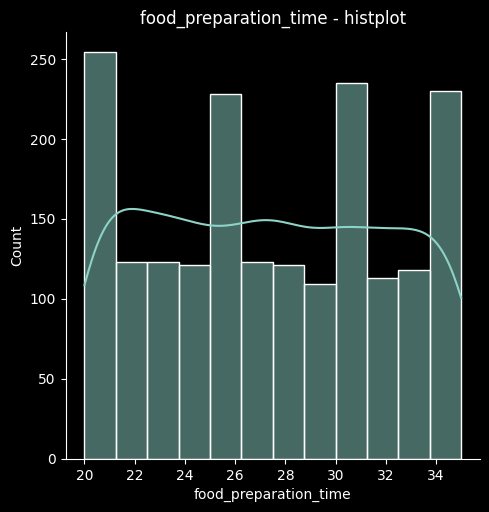

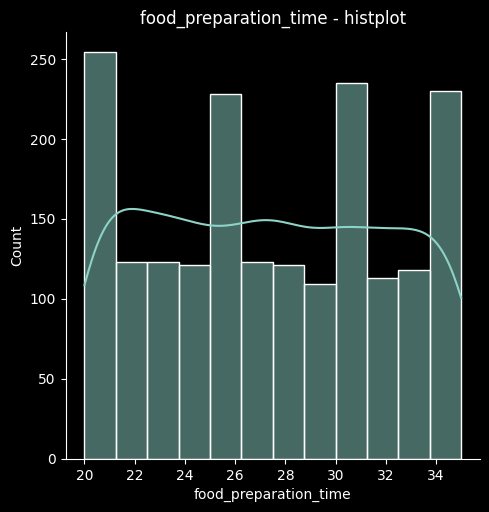

In [71]:
# food_preparation_time
print(f"median: {df['food_preparation_time'].median()}, Q1: {np.percentile(df['food_preparation_time'], 25)}, Q3: {np.percentile(df['food_preparation_time'], 75)}, max: {df['food_preparation_time'].max()}")
plt.style.use(['dark_background'])
sns.boxplot(data=df, x='food_preparation_time')# food_preparation_time
print(f"median: {df['food_preparation_time'].median()}, Q1: {np.percentile(df['food_preparation_time'], 25)}, Q3: {np.percentile(df['food_preparation_time'], 75)}, max: {df['food_preparation_time'].max()}")
plt.style.use(['dark_background'])
sns.boxplot(data=df, x='food_preparation_time')
plt.title('cfood_preparation_time - boxplot')
plt.show()
sns.displot(data=df, x='food_preparation_time', kde=True)
plt.title('food_preparation_time - histplot')
plt.show()
plt.show()
sns.displot(data=df, x='food_preparation_time', kde=True)
plt.title('food_preparation_time - histplot')
plt.show()

In [72]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


median: 25.0, Q1: 20.0, Q3: 28.0, max: 33


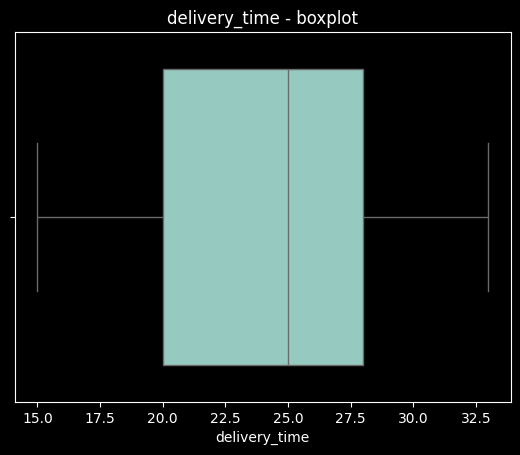

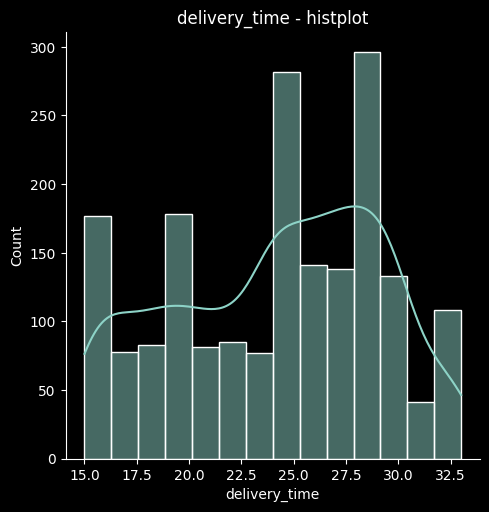

In [73]:
# delivery_time
print(f"median: {df['delivery_time'].median()}, Q1: {np.percentile(df['delivery_time'], 25)}, Q3: {np.percentile(df['delivery_time'], 75)}, max: {df['delivery_time'].max()}")
plt.style.use(['dark_background'])
sns.boxplot(data=df, x='delivery_time')
plt.title('delivery_time - boxplot')
plt.show()
sns.displot(data=df, x='delivery_time', kde=True)
plt.title('delivery_time - histplot')
plt.show()

In [74]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


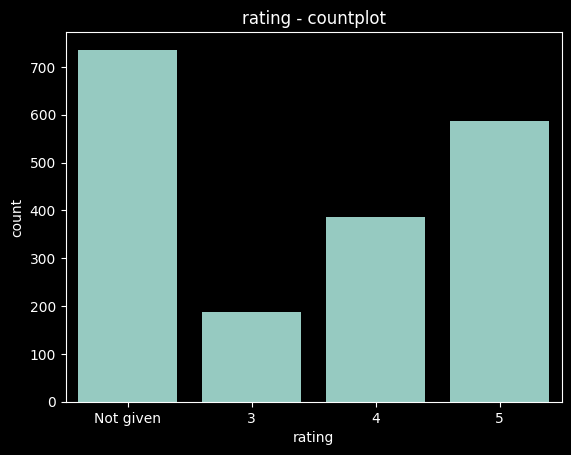

In [75]:
# rating
df['rating2'] = df['rating'].replace('Not given', np.nan)
plt.style.use(['dark_background'])
order = ['Not given', 3, 4, 5]
sns.countplot(data=df, x='rating', order=order)
plt.title('rating - countplot')
plt.show()

In [76]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating2
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4


restaurant count : 178


,0,1,2,3,4,5,6,7,8,9
restaurant_name,Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicken,Parm,RedFarm Broadway,RedFarm Hudson,TAO,Han Dynasty,Blue Ribbon Sushi Bar & Grill
proportion,0.115385,0.069547,0.062698,0.05058,0.035827,0.031085,0.028978,0.025817,0.024236,0.023182


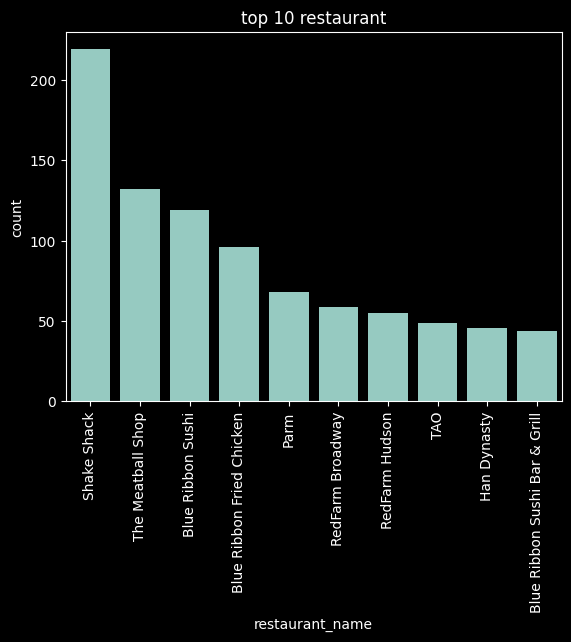

In [77]:
# restaurant
print(f"restaurant count : {df['restaurant_name'].nunique()}")
display(df['restaurant_name'].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False).head(10).T)

# order count top 10 restaurant
top10_order = df['restaurant_name'].value_counts(normalize=True).reset_index().head(10)['restaurant_name'].tolist()
sns.countplot(data=df.loc[df['restaurant_name'].isin(top10_order)], x='restaurant_name', order=top10_order)
plt.xticks(rotation=90)
plt.title('top 10 restaurant')
plt.show()

In [78]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating2
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4


cuisine type count : 14


,0,1,2,3,4
cuisine_type,American,Japanese,Italian,Chinese,Mexican
proportion,0.307692,0.247629,0.157007,0.113277,0.040569


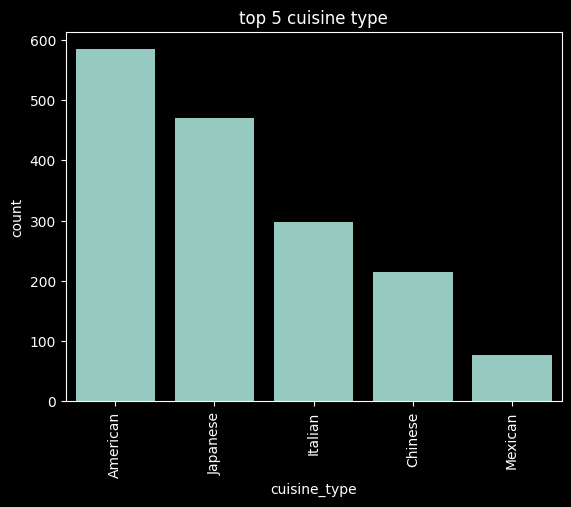

In [79]:
# cuisine_type
print(f"cuisine type count : {df['cuisine_type'].nunique()}")
display(df['cuisine_type'].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False).head().T)

# order count top 5 cuisine type
top5_type = df['cuisine_type'].value_counts(normalize=True).reset_index().head()['cuisine_type'].tolist()
sns.countplot(data=df.loc[df['cuisine_type'].isin(top5_type)], x='cuisine_type', order=top5_type)
plt.xticks(rotation=90)
plt.title('top 5 cuisine type')
plt.show()

In [80]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating2
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4


day of the week : 2


,0,1
day_of_the_week,Weekend,Weekday
proportion,0.711802,0.288198


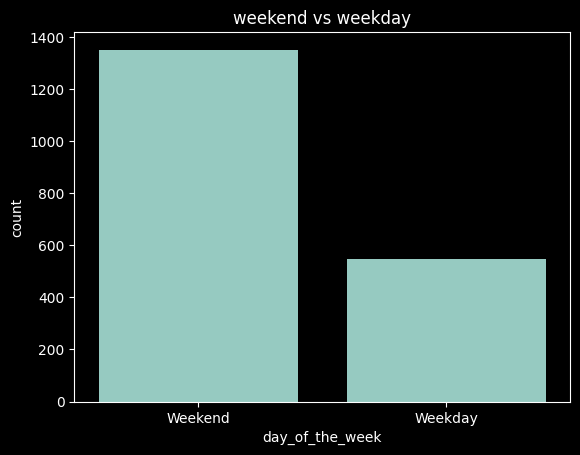

In [81]:
# day of the week
print(f"day of the week : {df['day_of_the_week'].nunique()}")
display(df['day_of_the_week'].value_counts(normalize=True).reset_index().T)

sns.countplot(data=df, x='day_of_the_week')
plt.title('weekend vs weekday')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [82]:
# Write the code here
display(df['restaurant_name'].value_counts().reset_index().sort_values('count', ascending=False).head().T)

,0,1,2,3,4
restaurant_name,Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicken,Parm
count,219,132,119,96,68


#### Observations: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm are the top 5 restaurants in terms of the number of orders received.


### **Question 8**: Which is the most popular cuisine on weekends?

In [83]:
# Write the code here
df.loc[df['day_of_the_week']=='Weekend', 'cuisine_type'].value_counts().reset_index().sort_values(by='count', ascending=False).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
cuisine_type,American,Japanese,Italian,Chinese,Mexican,Indian,Mediterranean,Middle Eastern,Thai,French,Korean,Southern,Spanish,Vietnamese
count,415,335,207,163,53,49,32,32,15,13,11,11,11,4


#### Observations: American is the most popular cuisine on Weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [84]:
# Write the code here
print(df.loc[df['cost_of_the_order']>20, 'order_id'].nunique() / df['order_id'].nunique())

0.2924130663856691


#### Observations: 29% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time?

In [85]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations: the mean order delivery time is 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [86]:
# Write the code here
df.groupby(['customer_id'])['order_id'].count().reset_index().sort_values(by='order_id', ascending=False).head(3)

,customer_id,order_id
116,52832,13
84,47440,10
333,83287,9


#### Observations: customer_id = 52832(order : 13), customer_id = 47440(order : 10), customer_id = 83287(order : 9)


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [87]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating2
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4


In [88]:
# cost of the order & food preparation time & delivery time correlation
df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


- there is no correlation.

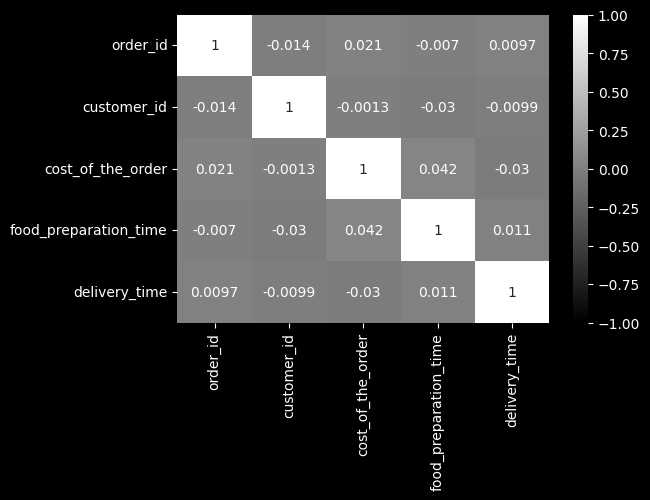

In [89]:
# heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='gray', vmin=-1, vmax=1)
plt.show()

In [90]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating2
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4


In [91]:
df['rating2'].isnull().sum() / df.shape[0]

0.38777660695468913

In [92]:
df['rating2'].notnull().head()

,rating2
0,False
1,False
2,True
3,True
4,True


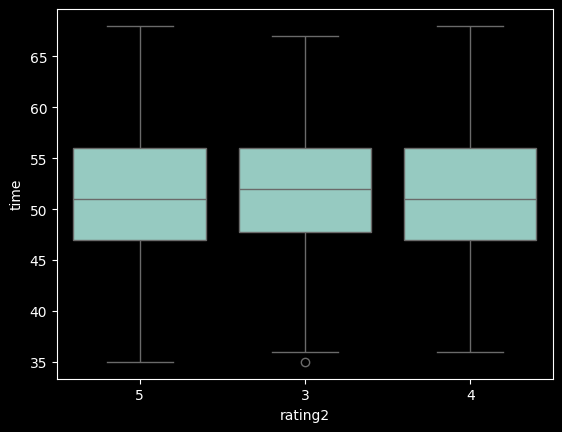

In [93]:
# rating & time
# time = food_preparation_time + delivery_time
df['time'] = df['food_preparation_time'] + df['delivery_time']
sns.boxplot(data=df.loc[df['rating2'].notnull()], x='rating2', y='time')
plt.show()

In [94]:
# restautrant & order_count & rating count
ror = pd.pivot_table(data=df, index='restaurant_name', values=['order_id', 'rating2'], aggfunc={'order_id':'nunique', 'rating2':'count'}).reset_index()
ror.sort_values(['order_id', 'rating2'], ascending=[False, False], inplace=True)
ror.rename(columns={'order_id':'order_cnt', 'rating2':'rating_cnt'}, inplace=True)
ror = ror.head(10)
ror

,restaurant_name,order_cnt,rating_cnt
136,Shake Shack,219,133
153,The Meatball Shop,132,84
21,Blue Ribbon Sushi,119,73
20,Blue Ribbon Fried Chicken,96,64
109,Parm,68,39
121,RedFarm Broadway,59,41
122,RedFarm Hudson,55,34
145,TAO,49,28
66,Han Dynasty,46,23
22,Blue Ribbon Sushi Bar & Grill,44,22


In [58]:
# cusine type & order_count & rating count
cor = pd.pivot_table(data=df, index='cuisine_type', values=['order_id', 'rating2'], aggfunc={'order_id':'nunique', 'rating2':'count'}).reset_index()
cor.sort_values(['order_id', 'rating2'], ascending=[False, False], inplace=True)
cor.rename(columns={'order_id':'order_cnt', 'rating2':'rating_cnt'}, inplace=True)
cor = cor.head(10)
cor

,cuisine_type,order_cnt,rating_cnt
0,American,584,368
5,Japanese,470,273
4,Italian,298,172
1,Chinese,215,133
8,Mexican,77,48
3,Indian,73,50
9,Middle Eastern,49,34
7,Mediterranean,46,32
12,Thai,19,9
2,French,18,10


In [95]:
df.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating2,time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5,51


In [102]:
# restaurant & cost of the order(median)
display(df.groupby(['restaurant_name'])['cost_of_the_order'].median().sort_values(ascending=False).head(10))
display(df.groupby(['restaurant_name'])['cost_of_the_order'].median().sort_values(ascending=False).tail(10))

,cost_of_the_order
restaurant_name,
Kambi Ramen House,32.930
Emporio,31.430
Bhatti Indian Grill,31.115
Haru Gramercy Park,29.830
Sarabeth's,29.300
Lucky Strike,29.250
Il Bambino,29.250
Rohm Thai,29.100
67 Burger,29.050


,cost_of_the_order
restaurant_name,
Gaia Italian Cafe,8.78
Chola Eclectic Indian Cuisine,8.73
Woorijip,8.25
'wichcraft,8.10
La Follia,8.05
Market Table,6.79
Wa Jeal,6.74
Cipriani Le Specialita,5.92
Big Wong Restaurant _¤¾Ñ¼,5.92


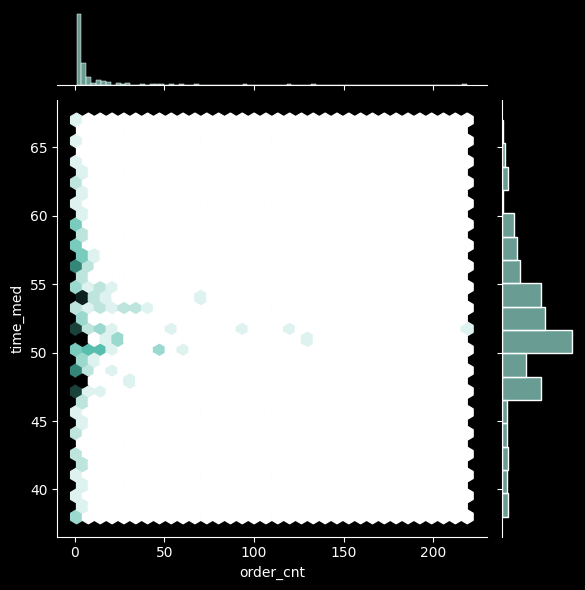

,restaurant_name,order_cnt,time_med
136,Shake Shack,219,52.0
153,The Meatball Shop,132,51.0
21,Blue Ribbon Sushi,119,52.0
20,Blue Ribbon Fried Chicken,96,51.5
109,Parm,68,54.0


In [115]:
# time & order_cnt
rot = df.pivot_table(index='restaurant_name', values=['order_id', 'time'], aggfunc={'order_id':'nunique', 'time':'median'}).reset_index()
rot.rename(columns={'order_id':'order_cnt', 'time':'time_med'}, inplace=True)
rot.sort_values(by=['order_cnt', 'time_med'], ascending=[False, True], inplace=True)
sns.jointplot(data=rot, x='order_cnt', y='time_med', kind='hex')
plt.show()
display(rot.head())

In [108]:
rot.corr(numeric_only=True)

,order_cnt,time_med
order_cnt,1.000000,0.003184
time_med,0.003184,1.000000


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [131]:
# Write the code here
a = df.groupby(['restaurant_name'])['rating2'].count().reset_index().sort_values(by='rating2', ascending=False)
a_50 = a.loc[a['rating2']>50, 'restaurant_name'].tolist()
b = df.loc[df['restaurant_name'].isin(a_50)]
b = b.loc[b['rating2'].notnull()]
b['rating2'] = b['rating2'].astype(int)
b.groupby(['restaurant_name'])['rating2'].mean()

,rating2
restaurant_name,
Blue Ribbon Fried Chicken,4.328125
Blue Ribbon Sushi,4.219178
Shake Shack,4.278195
The Meatball Shop,4.511905


#### Observations: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [141]:
# Write the code here
def commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return cost

df['commission'] = df['cost_of_the_order'].apply(commission)
print(f"total revenue : {sum(df['commission'])}")

total revenue : 6209.042999999994


#### Observations: total net revenue is 6209 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [145]:
# Write the code here
df.head(3)
df.loc[df['time'] > 60, 'order_id'].nunique() / df['order_id'].nunique()

0.1053740779768177

#### Observations: 10.53%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [147]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: The average delivery time on weekdays is 28.34 minutes, while on weekends it is 22.47 minutes, indicating that delivery time is generally faster on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  Approximately 38.7% of the orders do not have ratings.
* The first quartile (Q1) of the order cost is $12, the median is $14, the third quartile (Q3) is $22, and the maximum is $35.
* Food preparation time does not vary significantly between restaurants.
* The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
* Cuisine types are ranked as follows: American, Japanese, Italian, Chinese, and Mexican.
* There are more orders on weekends.
* There is no correlation between order cost, food preparation time, and delivery time.
* Ratings are not correlated with the total time (food preparation time + delivery time).
* Restaurants with more orders tend to have more ratings.
* It was assumed that restaurants with more orders would take longer to deliver, but in reality, high-order restaurants do not necessarily take more time.
* Restaurants with more than 50 orders and an average rating of 4 or higher are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.

### Recommendations:

*  It would be beneficial to secure restaurants focusing on cuisine types that had a high number of orders, such as American and Japanese. In particular, restaurants with both a high number of orders and an average rating of 4 or above, like Blue Ribbon Fried Chicken (American), Blue Ribbon Sushi (Japanese), and Shake Shack (American), should be referenced.
* The order cost should ideally not exceed the third quartile (Q3) value of $22. Additionally, as a significant number of orders occur on weekends, encouraging restaurant operations to focus on weekends would be advantageous
* Since food preparation time and delivery time do not significantly correlate with customer ratings, it would be better to focus on the quality and taste of the food. Furthermore, encouraging customers to leave ratings would also be beneficial.

---